In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('sample_data/car_prices.csv', sep=",")

In [ ]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

# функция, которая позволяет задавать колонку и вид импьютации
def impute_col(dataset, column, strategy_param, fill_value=''):
    temp_data = dataset.copy()  # Создаем копию исходного датасета

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data[[column]])

    imp_num = SimpleImputer(strategy=strategy_param) if fill_value == '' else SimpleImputer(strategy=strategy_param, fill_value=fill_value)
    data_num_imp = imp_num.fit_transform(temp_data[[column]])

    temp_data.loc[mask_missing_values_only[:,0], column] = data_num_imp[mask_missing_values_only[:,0]]

    return temp_data

In [ ]:
# численные столбцы
clean_data = impute_col(data, 'condition', 'mean')
clean_data = impute_col(clean_data, 'odometer', 'mean')
clean_data = impute_col(clean_data, 'mmr', 'median')
clean_data = impute_col(clean_data, 'sellingprice', 'median')

# категориальные столбцы
clean_data = impute_col(clean_data, 'make', 'constant', 'unknown')
clean_data = impute_col(clean_data, 'model', 'constant', 'unknown')
clean_data = impute_col(clean_data, 'trim', 'constant', 'unknown')
clean_data = impute_col(clean_data, 'body', 'most_frequent')
clean_data = impute_col(clean_data, 'transmission', 'most_frequent')
clean_data = impute_col(clean_data, 'vin', 'constant', 'unknown')
clean_data = impute_col(clean_data, 'color', 'most_frequent')
clean_data = impute_col(clean_data, 'interior', 'most_frequent')
clean_data = impute_col(clean_data, 'saledate', 'constant', 'unknown')

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  558837 non-null  int64  
 1   make                  558837 non-null  object 
 2   model                 558837 non-null  object 
 3   trim                  558837 non-null  object 
 4   body                  558837 non-null  object 
 5   transmission          558837 non-null  object 
 6   vin                   558837 non-null  object 
 7   state                 558837 non-null  object 
 8   condition             558837 non-null  float64
 9   odometer              558837 non-null  float64
 10  color                 558837 non-null  object 
 11  interior              558837 non-null  object 
 12  seller                558837 non-null  object 
 13  mmr                   558837 non-null  float64
 14  sellingprice          558837 non-null  float64
 15  

In [ ]:
clean_data['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime',
       '4802', '9410', '1167', '2172', '14872', '12655', '15719', '6388',
       '16633', '11034', '2711', '6864', '339', '18384', '9887', '9837',
       '20379', '20627', '721', '6158', '2817', '5705', '18561', '2846',
       '9562', '5001'], dtype=object)

In [ ]:
clean_data['transmission'].unique()

array(['automatic', 'manual', 'Sedan', 'sedan'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
clean_data['color_encoded'] = label_encoder.fit_transform(clean_data['color'])
clean_data['transmission_encoded'] = label_encoder.fit_transform(clean_data['transmission'])

In [ ]:
clean_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,color_encoded,transmission_encoded
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),43,1
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),43,1
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),33,1
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),43,1
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),33,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = StandardScaler()
clean_data['odometer_scaled'] = scaler.fit_transform(clean_data[['odometer']])

In [ ]:
clean_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,color_encoded,transmission_encoded,odometer_scaled
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),43,1,-0.967918
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),43,1,-1.103626
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),33,1,-1.254617
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),43,1,-1.012062
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),33,1,-1.230082


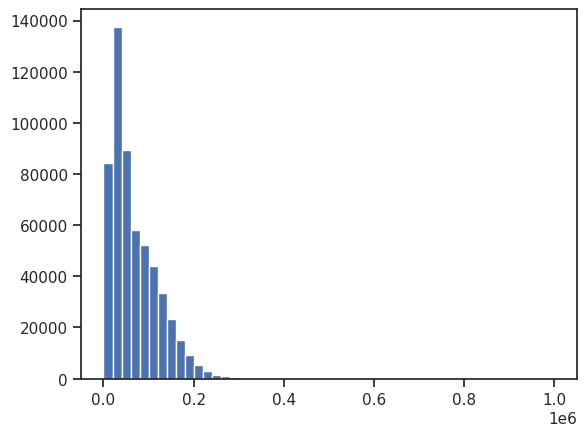

In [ ]:
plt.hist(clean_data['odometer'], 50)
plt.show()

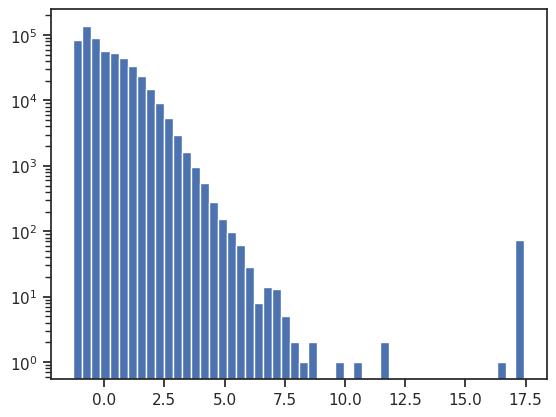

In [ ]:
plt.hist(clean_data['odometer_scaled'], 50)
plt.semilogy()
plt.show()